<a href="https://colab.research.google.com/github/erdcpatel/PythonDataScience/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx+b)}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [0]:
sigmoid(1, 0.5, 0)

0.6224593312018546

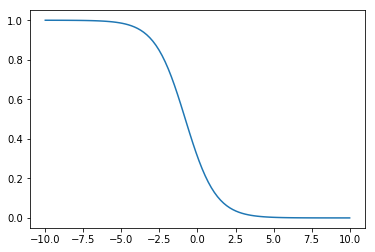

In [0]:
w = -1 #@param {type: "slider", min: -2, max: 2 , step: 0.1}
b = -0.8 #@param {type: "slider", min: -2, max: 2, step: 0.1}

X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [0]:
from mpl_toolkits import mplot3d

In [0]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

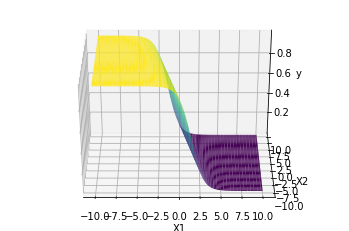

In [0]:
w1 = -1.4 #@param {type: "slider", min: -2, max: 2 , step: 0.1}
w2 = -0.2 #@param {type: "slider", min: -2, max: 2 , step: 0.1}
b = 0
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1 , XX2 = np.meshgrid(X1,X2)

#Y = sigmoid_2d(XX1, XX2, w1, w2, b)
#print(X1.shape , X2.shape, XX1.shape, XX2.shape)

Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y , cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

ax.view_init(30,270)

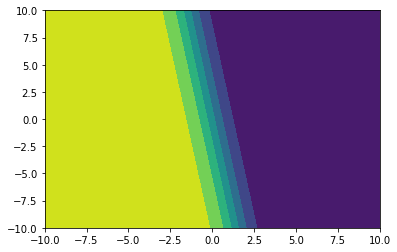

In [0]:
plt.contourf(XX1, XX2, Y)
plt.show()

# Compute Loss for Given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25
X = np.random.np.random.random(25) * 20 -10
Y = sigmoid(X, w_unknown, b_unknown)

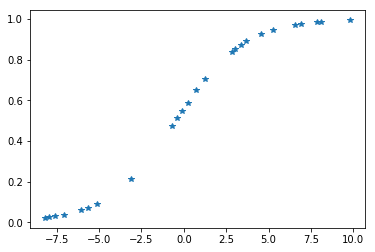

In [0]:
plt.plot(X, Y, '*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est)) ** 2
  return loss

In [0]:
W = np.linspace(-1, 1, 100)
B = np.linspace(-1, 1, 100)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j]) 

Text(0.5, 0, 'Loss')

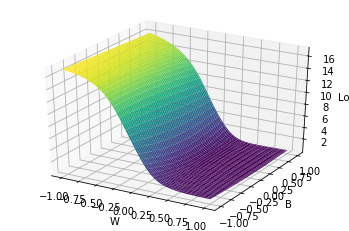

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss , cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

#ax.view_init(30,270)

# Class for Sigmoid Neoron

In [0]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x,self.w.T) + self.b

  def sigmoid(self, x):
    return 1.0 / (1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True):
    #Initialize
    if initialize:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0

      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)

      self.w -= learning_rate * dw
      self.b -= learning_rate * db
  

# Fit for toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1,1,1,0,0,0]

In [0]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [0]:
print(sn.w, sn.b)

[[-0.98128519 -0.41992833]] [0.01816618]


In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)

  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y)
  ax.plot()


[[ 0.88298902 -0.51735153]] [-0.09879988]
[[ 1.20232835 -0.06022884]] [-0.16340237]
[[ 1.13814543 -0.69832564]] [-0.24949417]
[[ 1.46209246 -0.18170697]] [-0.30965344]
[[ 1.38287106 -0.72466056]] [-0.40381899]
[[ 1.6125539  -0.34959066]] [-0.45703003]
[[ 1.57358175 -0.64001765]] [-0.51767993]
[[ 1.66804967 -0.50784569]] [-0.54682835]
[[ 1.68308425 -0.56681134]] [-0.57535222]
[[ 1.71720065 -0.56331765]] [-0.5982818]
[[ 1.74406077 -0.57444706]] [-0.62025152]
[[ 1.77028597 -0.58254808]] [-0.64067799]
[[ 1.79502367 -0.59049999]] [-0.65986]
[[ 1.81852164 -0.59803573]] [-0.67791654]
[[ 1.84089035 -0.60521156]] [-0.6949634]
[[ 1.86223154 -0.61205963]] [-0.71109938]
[[ 1.88263389 -0.61860821]] [-0.72641001]
[[ 1.90217516 -0.62488214]] [-0.74096977]
[[ 1.92092395 -0.63090328]] [-0.75484386]
[[ 1.93894106 -0.63669104]] [-0.76808965]


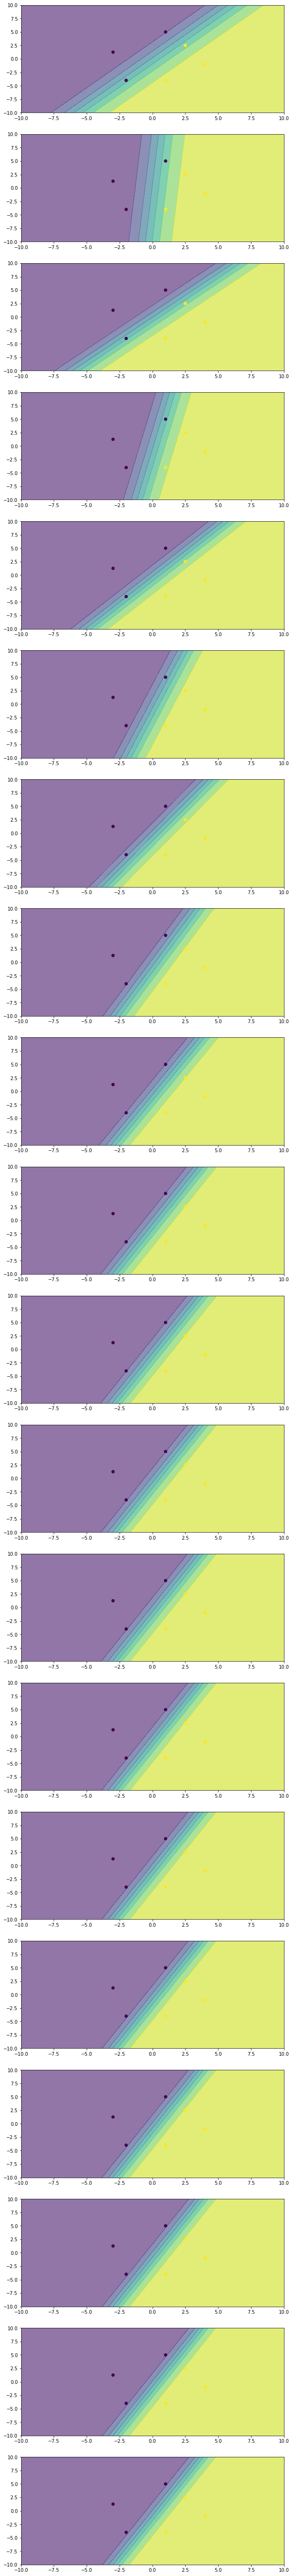

In [0]:
sn.fit(X, Y, 1, 0.75, True)
N = 20
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1 , i+1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.75, False)